In [1]:
import pandas as pd
import numpy as np
import nltk
import argparse, os, re, string, pickle
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Import Data

In [6]:
tweet_df = pd.read_csv('Data Tugas Akhir.csv')

In [7]:
print("Initial number of rows:", len(tweet_df))

tweet_df = tweet_df.drop_duplicates()

tweet_df.reset_index(drop=True, inplace=True)

Initial number of rows: 2506


In [8]:
tweet_df

,full_text,label
0,Dulu NU dipandang sbg partai oportunis sama ha...,neutral
1,Adakah yg berani berucap spt ucapan Musa jk se...,neutral
2,@kafir_introvert Ganjar sebenarnya yg paling c...,neutral
3,Nikmat yang Sering Dilupakan Salah satu makar ...,neutral
4,Anti tesis dari Boedi Oetomo dan Jong Java ada...,neutral
...,...,...
2495,@kurawa Pilpres sebelumnya ucapan dari kubu ma...,sexual harassment
2496,@Radiantjenstar @alwaysnever24 Itu karena saya...,sexual harassment
2497,@Radiantjenstar @alwaysnever24 Jenlacur sudah ...,sexual harassment
2498,@paimonfess ku juga suka homo â›…,sexual harassment


In [9]:
print(tweet_df['label'].value_counts())

label
neutral                     500
racist                      500
purposeful embarrassment    500
sexual harassment           500
physical threats            500
Name: count, dtype: int64


In [10]:
tweet_df.to_csv('cyber new.csv')

In [11]:
df = tweet_df
df

,full_text,label
0,Dulu NU dipandang sbg partai oportunis sama ha...,neutral
1,Adakah yg berani berucap spt ucapan Musa jk se...,neutral
2,@kafir_introvert Ganjar sebenarnya yg paling c...,neutral
3,Nikmat yang Sering Dilupakan Salah satu makar ...,neutral
4,Anti tesis dari Boedi Oetomo dan Jong Java ada...,neutral
...,...,...
2495,@kurawa Pilpres sebelumnya ucapan dari kubu ma...,sexual harassment
2496,@Radiantjenstar @alwaysnever24 Itu karena saya...,sexual harassment
2497,@Radiantjenstar @alwaysnever24 Jenlacur sudah ...,sexual harassment
2498,@paimonfess ku juga suka homo â›…,sexual harassment


In [12]:
labels = tweet_df['label']

In [13]:
df

,full_text,label
0,Dulu NU dipandang sbg partai oportunis sama ha...,neutral
1,Adakah yg berani berucap spt ucapan Musa jk se...,neutral
2,@kafir_introvert Ganjar sebenarnya yg paling c...,neutral
3,Nikmat yang Sering Dilupakan Salah satu makar ...,neutral
4,Anti tesis dari Boedi Oetomo dan Jong Java ada...,neutral
...,...,...
2495,@kurawa Pilpres sebelumnya ucapan dari kubu ma...,sexual harassment
2496,@Radiantjenstar @alwaysnever24 Itu karena saya...,sexual harassment
2497,@Radiantjenstar @alwaysnever24 Jenlacur sudah ...,sexual harassment
2498,@paimonfess ku juga suka homo â›…,sexual harassment


In [14]:
df = pd.DataFrame(df[['full_text']])
df

,full_text
0,Dulu NU dipandang sbg partai oportunis sama ha...
1,Adakah yg berani berucap spt ucapan Musa jk se...
2,@kafir_introvert Ganjar sebenarnya yg paling c...
3,Nikmat yang Sering Dilupakan Salah satu makar ...
4,Anti tesis dari Boedi Oetomo dan Jong Java ada...
...,...
2495,@kurawa Pilpres sebelumnya ucapan dari kubu ma...
2496,@Radiantjenstar @alwaysnever24 Itu karena saya...
2497,@Radiantjenstar @alwaysnever24 Jenlacur sudah ...
2498,@paimonfess ku juga suka homo â›…


# Preprocessing

In [15]:
df['Case Folding'] = df['full_text'].str.lower()
df

,full_text,Case Folding
0,Dulu NU dipandang sbg partai oportunis sama ha...,dulu nu dipandang sbg partai oportunis sama ha...
1,Adakah yg berani berucap spt ucapan Musa jk se...,adakah yg berani berucap spt ucapan musa jk se...
2,@kafir_introvert Ganjar sebenarnya yg paling c...,@kafir_introvert ganjar sebenarnya yg paling c...
3,Nikmat yang Sering Dilupakan Salah satu makar ...,nikmat yang sering dilupakan salah satu makar ...
4,Anti tesis dari Boedi Oetomo dan Jong Java ada...,anti tesis dari boedi oetomo dan jong java ada...
...,...,...
2495,@kurawa Pilpres sebelumnya ucapan dari kubu ma...,@kurawa pilpres sebelumnya ucapan dari kubu ma...
2496,@Radiantjenstar @alwaysnever24 Itu karena saya...,@radiantjenstar @alwaysnever24 itu karena saya...
2497,@Radiantjenstar @alwaysnever24 Jenlacur sudah ...,@radiantjenstar @alwaysnever24 jenlacur sudah ...
2498,@paimonfess ku juga suka homo â›…,@paimonfess ku juga suka homo â›…


In [16]:
#Data Cleansing
#Remove Special Char
def remove_tweet(text):
    #remove tab, new line, and back slice
    text = str(text).replace('\\t', " ").replace('\\n', " ").replace('\\u', " ").replace('\\', "")
    #remove non ASCII (emoticon, etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    text = re.sub(r'^rt[\s]+', '', text)
    #remove mention, link, hashtag
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    #remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")
df['Data Cleansing']=df['Case Folding'].apply(remove_tweet)
df.head()

,full_text,Case Folding,Data Cleansing
0,Dulu NU dipandang sbg partai oportunis sama ha...,dulu nu dipandang sbg partai oportunis sama ha...,dulu nu dipandang sbg partai oportunis sama ha...
1,Adakah yg berani berucap spt ucapan Musa jk se...,adakah yg berani berucap spt ucapan musa jk se...,adakah yg berani berucap spt ucapan musa jk se...
2,@kafir_introvert Ganjar sebenarnya yg paling c...,@kafir_introvert ganjar sebenarnya yg paling c...,introvert ganjar sebenarnya yg paling cocok sb...
3,Nikmat yang Sering Dilupakan Salah satu makar ...,nikmat yang sering dilupakan salah satu makar ...,nikmat yang sering dilupakan salah satu makar ...
4,Anti tesis dari Boedi Oetomo dan Jong Java ada...,anti tesis dari boedi oetomo dan jong java ada...,anti tesis dari boedi oetomo dan jong java ada...


In [17]:
#remove number
def remove_number(text):
    return re.sub(r"\d+", "", text)
df['Data Cleansing']=df['Data Cleansing'].apply(remove_number)


In [18]:
#remove user
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt
df['Data Cleansing'] = np.vectorize(remove_pattern)(df['Data Cleansing'], "@[\w]*")

In [19]:
#remove single char
def remove_single_char(text):
    return re.sub('(\\b[A-Za-z] \\b|\\b [A-Za-z]\\b)', '', text)
df['Data Cleansing']=df['Data Cleansing'].apply(remove_single_char)
df.head()


,full_text,Case Folding,Data Cleansing
0,Dulu NU dipandang sbg partai oportunis sama ha...,dulu nu dipandang sbg partai oportunis sama ha...,dulu nu dipandang sbg partai oportunis sama ha...
1,Adakah yg berani berucap spt ucapan Musa jk se...,adakah yg berani berucap spt ucapan musa jk se...,adakah yg berani berucap spt ucapan musa jk se...
2,@kafir_introvert Ganjar sebenarnya yg paling c...,@kafir_introvert ganjar sebenarnya yg paling c...,introvert ganjar sebenarnya yg paling cocok sb...
3,Nikmat yang Sering Dilupakan Salah satu makar ...,nikmat yang sering dilupakan salah satu makar ...,nikmat yang sering dilupakan salah satu makar ...
4,Anti tesis dari Boedi Oetomo dan Jong Java ada...,anti tesis dari boedi oetomo dan jong java ada...,anti tesis dari boedi oetomo dan jong java ada...


In [20]:
#Tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text
df['Tokenisasi']= df['Data Cleansing'].apply(tokenization)
df

,full_text,Case Folding,Data Cleansing,Tokenisasi
0,Dulu NU dipandang sbg partai oportunis sama ha...,dulu nu dipandang sbg partai oportunis sama ha...,dulu nu dipandang sbg partai oportunis sama ha...,"[dulu, nu, dipandang, sbg, partai, oportunis, ..."
1,Adakah yg berani berucap spt ucapan Musa jk se...,adakah yg berani berucap spt ucapan musa jk se...,adakah yg berani berucap spt ucapan musa jk se...,"[adakah, yg, berani, berucap, spt, ucapan, mus..."
2,@kafir_introvert Ganjar sebenarnya yg paling c...,@kafir_introvert ganjar sebenarnya yg paling c...,introvert ganjar sebenarnya yg paling cocok sb...,"[introvert, ganjar, sebenarnya, yg, paling, co..."
3,Nikmat yang Sering Dilupakan Salah satu makar ...,nikmat yang sering dilupakan salah satu makar ...,nikmat yang sering dilupakan salah satu makar ...,"[nikmat, yang, sering, dilupakan, salah, satu,..."
4,Anti tesis dari Boedi Oetomo dan Jong Java ada...,anti tesis dari boedi oetomo dan jong java ada...,anti tesis dari boedi oetomo dan jong java ada...,"[anti, tesis, dari, boedi, oetomo, dan, jong, ..."
...,...,...,...,...
2495,@kurawa Pilpres sebelumnya ucapan dari kubu ma...,@kurawa pilpres sebelumnya ucapan dari kubu ma...,pilpres sebelumnya ucapan dari kubu mana kur p...,"[pilpres, sebelumnya, ucapan, dari, kubu, mana..."
2496,@Radiantjenstar @alwaysnever24 Itu karena saya...,@radiantjenstar @alwaysnever24 itu karena saya...,itu karena saya baru saja menikmati meki pelac...,"[itu, karena, saya, baru, saja, menikmati, mek..."
2497,@Radiantjenstar @alwaysnever24 Jenlacur sudah ...,@radiantjenstar @alwaysnever24 jenlacur sudah ...,jenlacur sudah wajar jadi pelacur,"[jenlacur, sudah, wajar, jadi, pelacur]"
2498,@paimonfess ku juga suka homo â›…,@paimonfess ku juga suka homo â›…,ku juga suka homo,"[ku, juga, suka, homo]"


In [21]:
df.to_csv('normalisasi.csv')

In [22]:
def load_normalization_dict(file_path):
    normalization_dict = {}
    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
            if not line:
                continue  # Skip empty lines
            parts = line.split('=')
            if len(parts) == 2:
                slang, normal = parts
                normalization_dict[slang.strip()] = normal.strip()
            else:
                print(f"Warning: Skipping invalid line in normalization file: {line}")
    return normalization_dict

In [23]:
#Normalisasi
normalized_word = pd.read_csv('normalisasi.csv')


In [24]:
normalized_word_dict = load_normalization_dict('abbreviations_rev2.txt')


In [25]:
for index, row in normalized_word.iterrows():
    if row[0] not in normalized_word_dict:
        normalized_word_dict[row[0]] = row[1]


In [26]:
def normalize_text(text, normalization_dict):
    words = text.split()
    normalized_words = [normalization_dict.get(word, word) for word in words]
    return ' '.join(normalized_words)

In [27]:
def normalized_term(document):
    return [normalized_word_dict[term] if term in normalized_word_dict else term for 
term in document]

In [28]:
df['Normalisasi'] = df['Tokenisasi'].apply(normalized_term)
df

,full_text,Case Folding,Data Cleansing,Tokenisasi,Normalisasi
0,Dulu NU dipandang sbg partai oportunis sama ha...,dulu nu dipandang sbg partai oportunis sama ha...,dulu nu dipandang sbg partai oportunis sama ha...,"[dulu, nu, dipandang, sbg, partai, oportunis, ...","[dulu, nu, dipandang, sebagai, partai, oportun..."
1,Adakah yg berani berucap spt ucapan Musa jk se...,adakah yg berani berucap spt ucapan musa jk se...,adakah yg berani berucap spt ucapan musa jk se...,"[adakah, yg, berani, berucap, spt, ucapan, mus...","[adakah, yang, berani, berucap, seperti, ucapa..."
2,@kafir_introvert Ganjar sebenarnya yg paling c...,@kafir_introvert ganjar sebenarnya yg paling c...,introvert ganjar sebenarnya yg paling cocok sb...,"[introvert, ganjar, sebenarnya, yg, paling, co...","[introvert, ganjar, sebenarnya, yang, paling, ..."
3,Nikmat yang Sering Dilupakan Salah satu makar ...,nikmat yang sering dilupakan salah satu makar ...,nikmat yang sering dilupakan salah satu makar ...,"[nikmat, yang, sering, dilupakan, salah, satu,...","[nikmat, yang, sering, dilupakan, salah, satu,..."
4,Anti tesis dari Boedi Oetomo dan Jong Java ada...,anti tesis dari boedi oetomo dan jong java ada...,anti tesis dari boedi oetomo dan jong java ada...,"[anti, tesis, dari, boedi, oetomo, dan, jong, ...","[anti, tesis, dari, boedi, oetomo, dan, jong, ..."
...,...,...,...,...,...
2495,@kurawa Pilpres sebelumnya ucapan dari kubu ma...,@kurawa pilpres sebelumnya ucapan dari kubu ma...,pilpres sebelumnya ucapan dari kubu mana kur p...,"[pilpres, sebelumnya, ucapan, dari, kubu, mana...","[pilpres, sebelumnya, ucapan, dari, kubu, mana..."
2496,@Radiantjenstar @alwaysnever24 Itu karena saya...,@radiantjenstar @alwaysnever24 itu karena saya...,itu karena saya baru saja menikmati meki pelac...,"[itu, karena, saya, baru, saja, menikmati, mek...","[itu, karena, saya, baru, saja, menikmati, mek..."
2497,@Radiantjenstar @alwaysnever24 Jenlacur sudah ...,@radiantjenstar @alwaysnever24 jenlacur sudah ...,jenlacur sudah wajar jadi pelacur,"[jenlacur, sudah, wajar, jadi, pelacur]","[jenlacur, sudah, wajar, jadi, pelacur]"
2498,@paimonfess ku juga suka homo â›…,@paimonfess ku juga suka homo â›…,ku juga suka homo,"[ku, juga, suka, homo]","[ku, juga, suka, homo]"


In [29]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
#Stopwords Removal
stopword = nltk.corpus.stopwords.words('indonesian')
stopword.extend(['si', 'pala', 'kek', 'lo', 'klo', 'nih', 'pen', 'gin', 'tu', 'wkwkwk', 'mulu', 'nya', 'biar', 'amp',
                 'sih', 'emang', 'aa', 'aaaaaaaaa', 'aagura', 'aahhhh', 'aamon', 'ju', 'juju', 'zzz', 'zo',
                'zonauang', 'zonabu', 'hah', 'mah', 'gp', 'hr', 'ah', 'an', 'zy', 'sby', 'mujshidin', 'ahhh', 'ne',
                'bro', 'na', 'ta', 'ap', 'hhhh', 'gjerat', 'bbvipal', 'hsgshsga', 'si','nya','sih', 'ah', 'wkwowkowkwowkeoekeo' ])
stopword= set(stopword)


In [31]:
stopword

{'aa',
 'aaaaaaaaa',
 'aagura',
 'aahhhh',
 'aamon',
 'ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'ah',
 'ahhh',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'amp',
 'an',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'ap',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'bbvipal',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapal

In [32]:
def stopwords(text):
    text= [word for word in text if word not in stopword]
    return text

In [33]:
df["Stopwords"]= df["Normalisasi"].apply(stopwords)
df.head()

,full_text,Case Folding,Data Cleansing,Tokenisasi,Normalisasi,Stopwords
0,Dulu NU dipandang sbg partai oportunis sama ha...,dulu nu dipandang sbg partai oportunis sama ha...,dulu nu dipandang sbg partai oportunis sama ha...,"[dulu, nu, dipandang, sbg, partai, oportunis, ...","[dulu, nu, dipandang, sebagai, partai, oportun...","[nu, dipandang, partai, oportunis, halnya, pni..."
1,Adakah yg berani berucap spt ucapan Musa jk se...,adakah yg berani berucap spt ucapan musa jk se...,adakah yg berani berucap spt ucapan musa jk se...,"[adakah, yg, berani, berucap, spt, ucapan, mus...","[adakah, yang, berani, berucap, seperti, ucapa...","[adakah, berani, berucap, ucapan, musa, orang,..."
2,@kafir_introvert Ganjar sebenarnya yg paling c...,@kafir_introvert ganjar sebenarnya yg paling c...,introvert ganjar sebenarnya yg paling cocok sb...,"[introvert, ganjar, sebenarnya, yg, paling, co...","[introvert, ganjar, sebenarnya, yang, paling, ...","[introvert, ganjar, cocok, penerus, jokowi, ba..."
3,Nikmat yang Sering Dilupakan Salah satu makar ...,nikmat yang sering dilupakan salah satu makar ...,nikmat yang sering dilupakan salah satu makar ...,"[nikmat, yang, sering, dilupakan, salah, satu,...","[nikmat, yang, sering, dilupakan, salah, satu,...","[nikmat, dilupakan, salah, makar, orang, kafir..."
4,Anti tesis dari Boedi Oetomo dan Jong Java ada...,anti tesis dari boedi oetomo dan jong java ada...,anti tesis dari boedi oetomo dan jong java ada...,"[anti, tesis, dari, boedi, oetomo, dan, jong, ...","[anti, tesis, dari, boedi, oetomo, dan, jong, ...","[anti, tesis, boedi, oetomo, jong, java, sarek..."


In [34]:
#Stemming
factory = StemmerFactory()
stem_say = factory.create_stemmer()
def stemmed_wrapper(term):
    return stem_say.stem(term)
term_base = {}
for document in df['Stopwords']:
    for term in document:
        if term not in term_base:
            term_base[term] = " "
print(len(term_base))
print("------------------------")


8187
------------------------


In [35]:
for term in term_base:
    term_base[term] = stemmed_wrapper(term)
    print(term,":" ,term_base[term])
print(term_base)
print("------------------------")

nu : nu
dipandang : pandang
partai : partai
oportunis : oportunis
halnya : hal
pni : pni
stereotip : stereotip
diprovokasi : provokasi
kesiapan : kesiap
pemerintahan : perintah
belanda : belanda
asing : asing
kafir : kafir
dipahami : paham
serius : serius
mudah : mudah
dibantah : ban
sikap : sikap
kehati : hati
hatian : hati
kewaspadaan : waspada
kompromi : kompromi
kiai : kiai
adakah : ada
berani : berani
berucap : ucap
ucapan : ucap
musa : musa
orang : orang
bilang : bilang
pdnya : pdnya
mencoblos : coblos
berkuasa : kuasa
islam : islam
musnah : musnah
negeri : negeri
kallaa : kallaa
inna : inna
my : my
iya : iya
rabbii : rabbii
sayahdiin : sayahdiin
jiwa : jiwa
nabi : nabi
suruh : suruh
meluruskan : lurus
shaf : shaf
hati : hati
berselisih : selisih
rasulullah : rasulullah
larang : larang
tasyabuh : tasyabuh
condong : condong
kekufuran : kufur
perbaiki : baik
amal : amal
introvert : introvert
ganjar : ganjar
cocok : cocok
penerus : terus
jokowi : jokowi
backgroundnya : backgroundnya

In [36]:
def get_stemmed_term(document):
    return [term_base[term] for term in document]


In [37]:
df['Stemmer'] = df['Stopwords'].apply(get_stemmed_term)
print(df['Stemmer'])

0       [nu, pandang, partai, oportunis, hal, pni, ste...
1       [ada, berani, ucap, ucap, musa, orang, bilang,...
2       [introvert, ganjar, cocok, terus, jokowi, back...
3       [nikmat, lupa, salah, makar, orang, kafir, jad...
4       [anti, tesis, boedi, oetomo, jong, java, sarek...
                              ...                        
2495    [pilpres, ucap, kubu, kur, lacur, cebok, bersi...
2496    [nikmat, mek, lacur, mama, ku, seks, keahliaan...
2497                             [jenlacur, wajar, lacur]
2498                                     [ku, suka, homo]
2499    [eric, cantona, on, ig, bela, hak, asasi, manu...
Name: Stemmer, Length: 2500, dtype: object


In [38]:
df['Stemmer'] = df['Stopwords'].apply(get_stemmed_term)
df

,full_text,Case Folding,Data Cleansing,Tokenisasi,Normalisasi,Stopwords,Stemmer
0,Dulu NU dipandang sbg partai oportunis sama ha...,dulu nu dipandang sbg partai oportunis sama ha...,dulu nu dipandang sbg partai oportunis sama ha...,"[dulu, nu, dipandang, sbg, partai, oportunis, ...","[dulu, nu, dipandang, sebagai, partai, oportun...","[nu, dipandang, partai, oportunis, halnya, pni...","[nu, pandang, partai, oportunis, hal, pni, ste..."
1,Adakah yg berani berucap spt ucapan Musa jk se...,adakah yg berani berucap spt ucapan musa jk se...,adakah yg berani berucap spt ucapan musa jk se...,"[adakah, yg, berani, berucap, spt, ucapan, mus...","[adakah, yang, berani, berucap, seperti, ucapa...","[adakah, berani, berucap, ucapan, musa, orang,...","[ada, berani, ucap, ucap, musa, orang, bilang,..."
2,@kafir_introvert Ganjar sebenarnya yg paling c...,@kafir_introvert ganjar sebenarnya yg paling c...,introvert ganjar sebenarnya yg paling cocok sb...,"[introvert, ganjar, sebenarnya, yg, paling, co...","[introvert, ganjar, sebenarnya, yang, paling, ...","[introvert, ganjar, cocok, penerus, jokowi, ba...","[introvert, ganjar, cocok, terus, jokowi, back..."
3,Nikmat yang Sering Dilupakan Salah satu makar ...,nikmat yang sering dilupakan salah satu makar ...,nikmat yang sering dilupakan salah satu makar ...,"[nikmat, yang, sering, dilupakan, salah, satu,...","[nikmat, yang, sering, dilupakan, salah, satu,...","[nikmat, dilupakan, salah, makar, orang, kafir...","[nikmat, lupa, salah, makar, orang, kafir, jad..."
4,Anti tesis dari Boedi Oetomo dan Jong Java ada...,anti tesis dari boedi oetomo dan jong java ada...,anti tesis dari boedi oetomo dan jong java ada...,"[anti, tesis, dari, boedi, oetomo, dan, jong, ...","[anti, tesis, dari, boedi, oetomo, dan, jong, ...","[anti, tesis, boedi, oetomo, jong, java, sarek...","[anti, tesis, boedi, oetomo, jong, java, sarek..."
...,...,...,...,...,...,...,...
2495,@kurawa Pilpres sebelumnya ucapan dari kubu ma...,@kurawa pilpres sebelumnya ucapan dari kubu ma...,pilpres sebelumnya ucapan dari kubu mana kur p...,"[pilpres, sebelumnya, ucapan, dari, kubu, mana...","[pilpres, sebelumnya, ucapan, dari, kubu, mana...","[pilpres, ucapan, kubu, kur, pelacur, ceboknya...","[pilpres, ucap, kubu, kur, lacur, cebok, bersi..."
2496,@Radiantjenstar @alwaysnever24 Itu karena saya...,@radiantjenstar @alwaysnever24 itu karena saya...,itu karena saya baru saja menikmati meki pelac...,"[itu, karena, saya, baru, saja, menikmati, mek...","[itu, karena, saya, baru, saja, menikmati, mek...","[menikmati, meki, pelacur, mama, ku, seks, kea...","[nikmat, mek, lacur, mama, ku, seks, keahliaan..."
2497,@Radiantjenstar @alwaysnever24 Jenlacur sudah ...,@radiantjenstar @alwaysnever24 jenlacur sudah ...,jenlacur sudah wajar jadi pelacur,"[jenlacur, sudah, wajar, jadi, pelacur]","[jenlacur, sudah, wajar, jadi, pelacur]","[jenlacur, wajar, pelacur]","[jenlacur, wajar, lacur]"
2498,@paimonfess ku juga suka homo â›…,@paimonfess ku juga suka homo â›…,ku juga suka homo,"[ku, juga, suka, homo]","[ku, juga, suka, homo]","[ku, suka, homo]","[ku, suka, homo]"


In [39]:
tweet_df['label'] = labels

In [40]:
tweet_df['Stemmer'] = df['Stopwords'].apply(get_stemmed_term)


In [41]:
tweet_df.head()

,full_text,label,Stemmer
0,Dulu NU dipandang sbg partai oportunis sama ha...,neutral,"[nu, pandang, partai, oportunis, hal, pni, ste..."
1,Adakah yg berani berucap spt ucapan Musa jk se...,neutral,"[ada, berani, ucap, ucap, musa, orang, bilang,..."
2,@kafir_introvert Ganjar sebenarnya yg paling c...,neutral,"[introvert, ganjar, cocok, terus, jokowi, back..."
3,Nikmat yang Sering Dilupakan Salah satu makar ...,neutral,"[nikmat, lupa, salah, makar, orang, kafir, jad..."
4,Anti tesis dari Boedi Oetomo dan Jong Java ada...,neutral,"[anti, tesis, boedi, oetomo, jong, java, sarek..."


In [42]:
tweet_df = tweet_df.drop('full_text', axis=1)

In [43]:
tweet_df

,label,Stemmer
0,neutral,"[nu, pandang, partai, oportunis, hal, pni, ste..."
1,neutral,"[ada, berani, ucap, ucap, musa, orang, bilang,..."
2,neutral,"[introvert, ganjar, cocok, terus, jokowi, back..."
3,neutral,"[nikmat, lupa, salah, makar, orang, kafir, jad..."
4,neutral,"[anti, tesis, boedi, oetomo, jong, java, sarek..."
...,...,...
2495,sexual harassment,"[pilpres, ucap, kubu, kur, lacur, cebok, bersi..."
2496,sexual harassment,"[nikmat, mek, lacur, mama, ku, seks, keahliaan..."
2497,sexual harassment,"[jenlacur, wajar, lacur]"
2498,sexual harassment,"[ku, suka, homo]"


In [44]:
tweet_df.to_csv("stemmer.csv")

# Train the Models


Model: Logistic Regression

Confusion Matrix:
[[267  69  58  86  20]
 [ 48 441   7   3   1]
 [ 27   0 459   6   8]
 [ 74   0   5 419   2]
 [  8   0   8   2 482]]

Classification Report:
                          precision    recall  f1-score   support

                 neutral       0.63      0.53      0.58       500
        physical threats       0.86      0.88      0.87       500
purposeful embarrassment       0.85      0.92      0.89       500
                  racist       0.81      0.84      0.82       500
       sexual harassment       0.94      0.96      0.95       500

                accuracy                           0.83      2500
               macro avg       0.82      0.83      0.82      2500
            weighted avg       0.82      0.83      0.82      2500

Accuracy: 0.8272


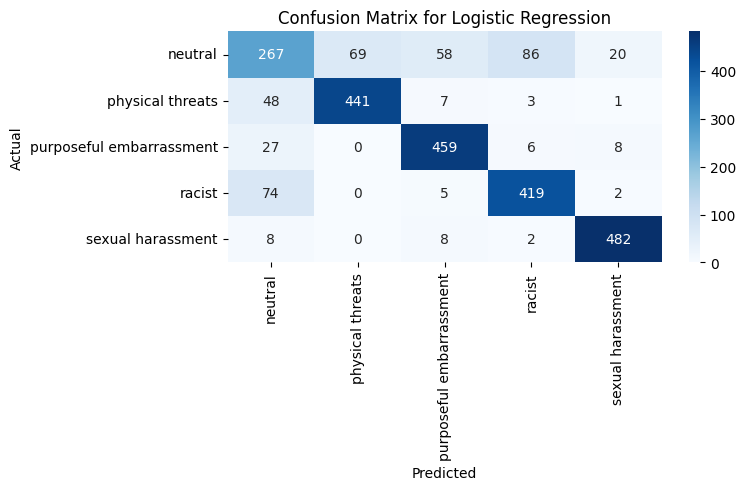


Model: Naive Bayes

Confusion Matrix:
[[221  83  58 110  28]
 [ 49 431   6   9   5]
 [ 29   2 428  24  17]
 [ 53   4   8 429   6]
 [  8   1  14  11 466]]

Classification Report:
                          precision    recall  f1-score   support

                 neutral       0.61      0.44      0.51       500
        physical threats       0.83      0.86      0.84       500
purposeful embarrassment       0.83      0.86      0.84       500
                  racist       0.74      0.86      0.79       500
       sexual harassment       0.89      0.93      0.91       500

                accuracy                           0.79      2500
               macro avg       0.78      0.79      0.78      2500
            weighted avg       0.78      0.79      0.78      2500

Accuracy: 0.79


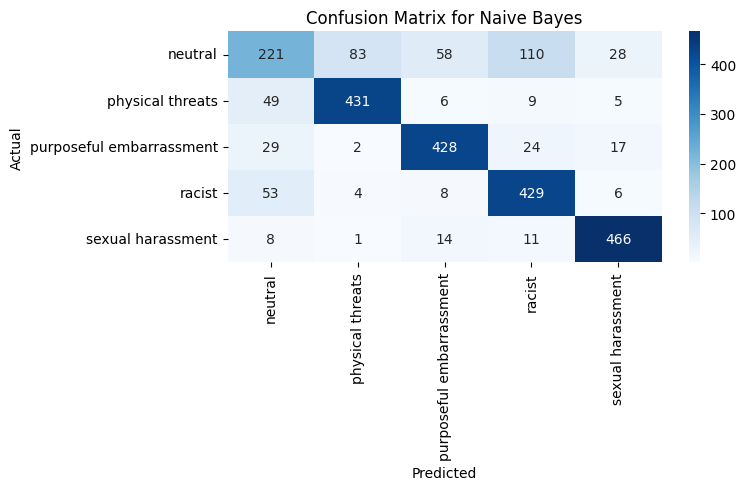


Model: K-Nearest Neighbors

Confusion Matrix:
[[270  70  54  81  25]
 [ 68 415   7   6   4]
 [ 44  13 398  16  29]
 [ 96  15  17 361  11]
 [ 34   6   5   7 448]]

Classification Report:
                          precision    recall  f1-score   support

                 neutral       0.53      0.54      0.53       500
        physical threats       0.80      0.83      0.81       500
purposeful embarrassment       0.83      0.80      0.81       500
                  racist       0.77      0.72      0.74       500
       sexual harassment       0.87      0.90      0.88       500

                accuracy                           0.76      2500
               macro avg       0.76      0.76      0.76      2500
            weighted avg       0.76      0.76      0.76      2500

Accuracy: 0.7568


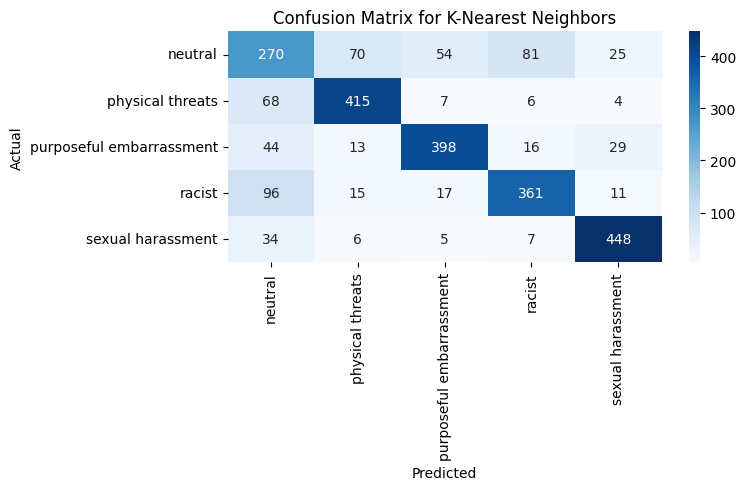

In [46]:
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
import seaborn as sns

# Inisialisasi K-Fold
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Ekstraksi fitur pada dataset keseluruhan
X = df['Stemmer'].apply(' '.join)
y = tweet_df['label']

# Daftar model
models = [
    ('Logistic Regression', LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)),
    ('Naive Bayes', MultinomialNB()),
    ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors = 9, metric = 'euclidean'))
]


# Cross-validation loop
for model_name, model in models:
    print(f"\nModel: {model_name}")
    
    # Predict cross-validation labels for the entire dataset
    X_tfidf = tfidf_vectorizer.fit_transform(X)
    y_pred = cross_val_predict(model, X_tfidf, y, cv=kfold)
    
    # Evaluasi model
    cm = confusion_matrix(y, y_pred)
    cr = classification_report(y, y_pred)
    accuracy = accuracy_score(y, y_pred)
    
    print("\nConfusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(cr)
    print(f"Accuracy: {accuracy}")
    
    plt.figure(figsize=(7,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()
    

# List of TF-IDF Values

In [47]:
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)

feature_names = tfidf_vectorizer.get_feature_names_out()

# Membuat DataFrame dari nilai TF-IDF
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=feature_names)
tfidf_df
# Menampilkan beberapa baris dari DataFrame


,aamin,abad,abadi,abah,abai,abal,abang,abangkuh,abdi,abg,...,zigot,zionis,zionisme,zionist,zionus,zodiac,zonk,zoolander,zoom,zoyboy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Displays the Values for Each Iteration

In [48]:
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Inisialisasi K-Fold
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Ekstraksi fitur pada dataset keseluruhan
X = df['Stemmer'].apply(' '.join)
y = tweet_df['label']

# Daftar model
models = [
    ('Logistic Regression', LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)),
    ('Naive Bayes', MultinomialNB()),
    ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors = 7, metric = 'euclidean'))
]

# Cross-validation loop
for model_name, model in models:
    print("\nModel:", model_name)
    # Cross-validation loop
    for train_index, test_index in kfold.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Transformasi teks menjadi representasi vektor TF-IDF pada setiap lipatan
        X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
        X_test_tfidf = tfidf_vectorizer.transform(X_test)

        # Inisialisasi dan latih model
        model.fit(X_train_tfidf, y_train)

        # Prediksi pada set uji
        y_pred = model.predict(X_test_tfidf)

        # Evaluasi model
        cm = confusion_matrix(y_test, y_pred)
        cr = classification_report(y_test, y_pred)

        print("\nConfusion Matrix:")
        print(cm)
        print("\nClassification Report:")
        print(cr)

# Menyimpan nilai akurasi dan confusion matrix untuk setiap lipatan jika diperlukan



Model: Logistic Regression

Confusion Matrix:
[[30  2  4  8  1]
 [ 4 47  3  0  0]
 [ 2  0 38  1  1]
 [ 7  0  2 52  0]
 [ 0  0  1  0 47]]

Classification Report:
                          precision    recall  f1-score   support

                 neutral       0.70      0.67      0.68        45
        physical threats       0.96      0.87      0.91        54
purposeful embarrassment       0.79      0.90      0.84        42
                  racist       0.85      0.85      0.85        61
       sexual harassment       0.96      0.98      0.97        48

                accuracy                           0.86       250
               macro avg       0.85      0.85      0.85       250
            weighted avg       0.86      0.86      0.86       250


Confusion Matrix:
[[22 12  6  6  1]
 [ 3 36  1  1  0]
 [ 1  0 51  1  0]
 [ 2  0  0 57  0]
 [ 0  0  1  0 49]]

Classification Report:
                          precision    recall  f1-score   support

                 neutral       0.79     

# Displays Wordcloud

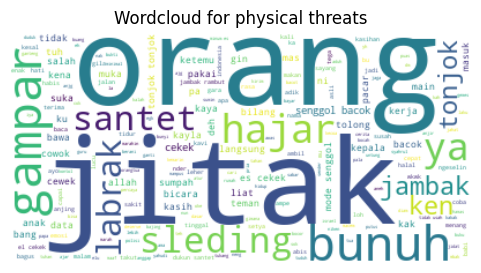

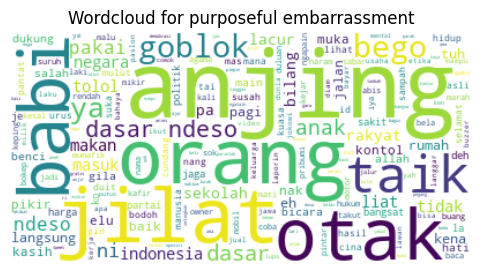

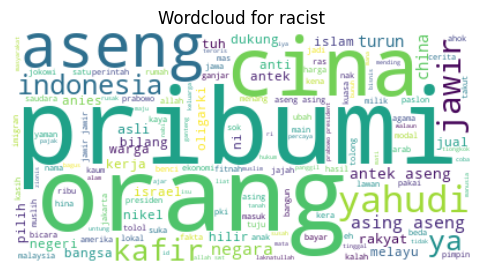

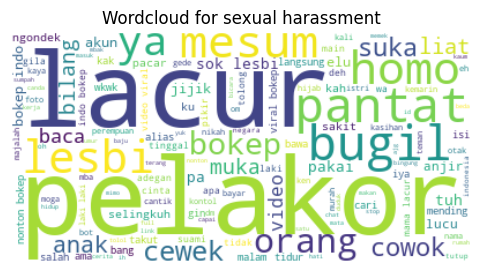

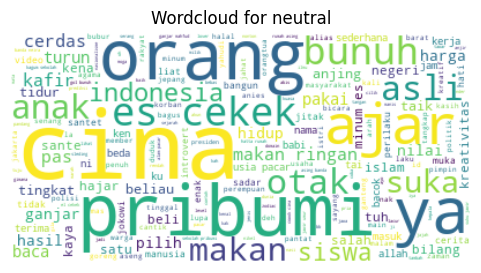

In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Fungsi untuk mengambil teks berdasarkan label
def get_text_by_label(df, label):
    filtered_df = df[df['label'] == label]
    text = ' '.join(filtered_df['Stemmer'].apply(lambda x: ' '.join(x)))
    return text

# Buat word cloud untuk setiap label
labels = ['physical threats', 'purposeful embarrassment', 'racist', 'sexual harassment', 'neutral']
for label in labels:
    label_text = get_text_by_label(tweet_df, label)
    
    # Periksa apakah teks kosong
    if not label_text.strip():
        print(f"No text found for label: {label}")
        continue
    
    # Buat word cloud
    wordcloud = WordCloud(background_color="white").generate(label_text)
    
    # Tampilkan word cloud
    plt.figure(figsize=(7, 3))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Wordcloud for {label}")
    plt.show()


# Displays a Bar Chart


Model: Logistic Regression

Model: Naive Bayes

Model: K-Nearest Neighbors
                 Model  Accuracy  Precision  Recall  F1-Score
0  Logistic Regression    0.8272   0.820152  0.8272  0.822573
1          Naive Bayes    0.7900   0.780480  0.7900  0.781317
2  K-Nearest Neighbors    0.7568   0.757479  0.7568  0.756825


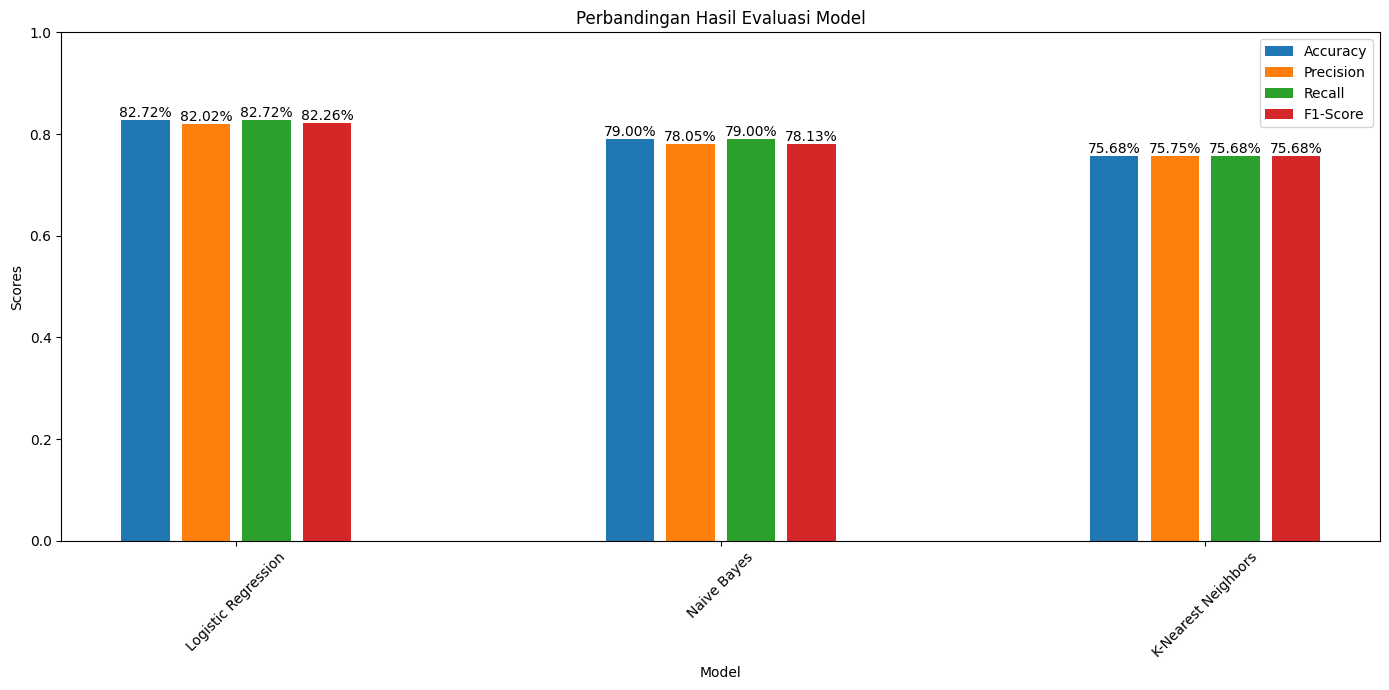

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Inisialisasi K-Fold
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Ekstraksi fitur pada dataset keseluruhan
X = df['Stemmer'].apply(' '.join)
y = tweet_df['label']

# Daftar model
models = [
    ('Logistic Regression', LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)),
    ('Naive Bayes', MultinomialNB()),
    ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors=9, metric='euclidean'))
]

# Dictionary untuk menyimpan hasil evaluasi
evaluation_results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

# Cross-validation loop
for model_name, model in models:
    print(f"\nModel: {model_name}")
    
    # Transformasi teks menjadi representasi vektor TF-IDF
    X_tfidf = tfidf_vectorizer.fit_transform(X)
    
    # Predict cross-validation labels for the entire dataset
    y_pred = cross_val_predict(model, X_tfidf, y, cv=kfold)
    
    # Evaluasi model
    cr = classification_report(y, y_pred, output_dict=True)
    evaluation_results['Model'].append(model_name)
    evaluation_results['Accuracy'].append(cr['accuracy'])
    evaluation_results['Precision'].append(cr['weighted avg']['precision'])
    evaluation_results['Recall'].append(cr['weighted avg']['recall'])
    evaluation_results['F1-Score'].append(cr['weighted avg']['f1-score'])

evaluation_df = pd.DataFrame(evaluation_results)
print(evaluation_df)

# Plotting hasil evaluasi dalam satu bar chart
plt.figure(figsize=(14, 7))

# Mengatur posisi bar
bar_width = 0.2
index = np.arange(len(models)) * 2

# Bar untuk setiap metrik
bar1 = plt.bar(index, evaluation_df['Accuracy'], bar_width, label='Accuracy')
bar2 = plt.bar(index + bar_width + 0.05, evaluation_df['Precision'], bar_width, label='Precision')
bar3 = plt.bar(index + 2 * (bar_width + 0.05), evaluation_df['Recall'], bar_width, label='Recall')
bar4 = plt.bar(index + 3 * (bar_width + 0.05), evaluation_df['F1-Score'], bar_width, label='F1-Score')

# Menambahkan teks persentase di atas setiap bar
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2%}', ha='center', va='bottom', fontsize=10)

add_value_labels(bar1)
add_value_labels(bar2)
add_value_labels(bar3)
add_value_labels(bar4)

# Labeling plot
plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Perbandingan Hasil Evaluasi Model')
plt.xticks(index + 1.5 * (bar_width + 0.05), evaluation_df['Model'], rotation=45)
plt.ylim(0, 1)
plt.legend()

plt.tight_layout()
plt.show()


# Displays a Pie Chart

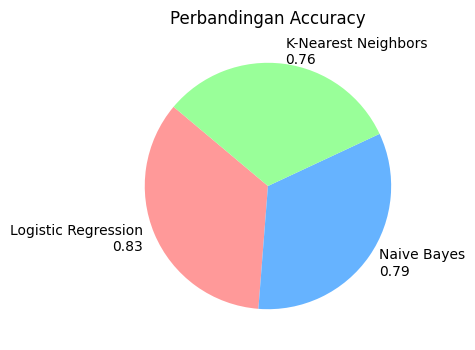

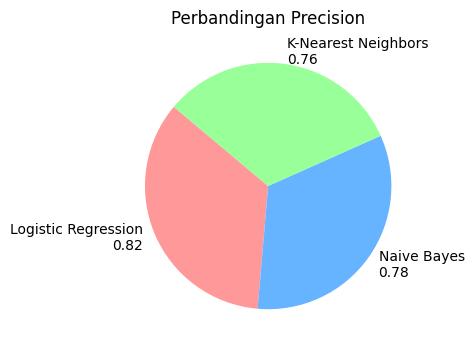

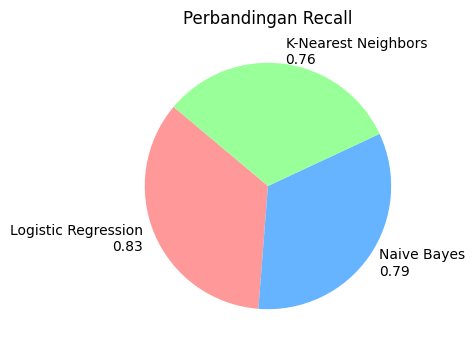

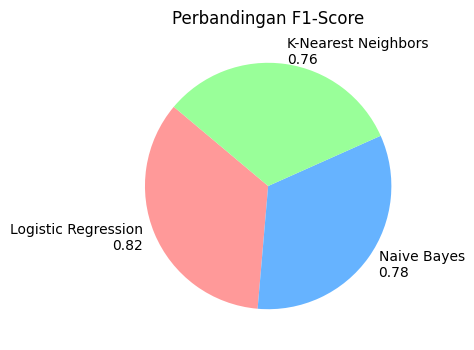

In [104]:
evaluation_results = {
    'Model': ['Logistic Regression', 'Naive Bayes', 'K-Nearest Neighbors'],
    'Accuracy': [0.83, 0.79, 0.76],
    'Precision': [0.82, 0.78, 0.76],
    'Recall': [0.83, 0.79, 0.76],
    'F1-Score': [0.82, 0.78, 0.76]
}

evaluation_df = pd.DataFrame(evaluation_results)

# Fungsi untuk membuat pie chart dengan nilai asli di dalamnya
def plot_pie_chart_with_values(metric_name):
    sizes = evaluation_df[metric_name]
    models = evaluation_df['Model']
    
    plt.figure(figsize=(7, 4))
    
    
    plt.pie(sizes, labels=[f'{model}\n{size:.2f}' for model, size in zip(models, sizes)],
            startangle=140, colors=['#ff9999', '#66b3ff', '#99ff99'])
    plt.title(f'Perbandingan {metric_name}')
    plt.show()


# Plotting pie chart untuk setiap metrik
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
for metric in metrics:
    plot_pie_chart_with_values(metric)
